# HW 6 : FOURIER TRANSFORM 
## (IMAGE/DATA COMPRESSION)
1. From web:
 download the data from http://www-personal.umich.edu/~mejn/cp/data/circular.txt
 using Fourier transform to process the image and figure out how to compress the data.
 
3. Compare it with the size which you obtained via plt.savefig()

2. Choose your own data or online data to play with DFT, IDFT and fitting with different functions.

[[1.         0.99980001 0.99920011 0.99820054 0.99680171]
 [0.99980001 0.99960003 0.99900017 0.99800067 0.99660193]
 [0.99920011 0.99900017 0.99840043 0.99740113 0.99600267]
 [0.99820054 0.99800067 0.99740113 0.99640216 0.99500417]
 [0.99680171 0.99660193 0.99600267 0.99500417 0.99360682]]
(501, 501)


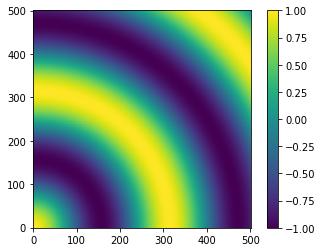

In [73]:
# Ronaldo Ascano
# due 10.10.18

import urllib.request
import matplotlib.pyplot as plt
import numpy as np

req = urllib.request.Request('http://www-personal.umich.edu/~mejn/cp/data/circular.txt')
response = urllib.request.urlopen(req)
the_page = response.read().decode()

data = np.fromstring(the_page, dtype="float", sep=' ')
data = np.reshape(data,[501,501])

print (data[:5,:5])
print(np.shape(data))

plt.imshow(data, origin="lower")
plt.colorbar()

# saves image in my desktop
plt.savefig('/Users/ronascano/Desktop/image.png', format='png', bbox_inches='tight')

### Stored in my desktop this image's file size is 58 KB.

In [15]:
import timeit

In [4]:
%timeit np.fft.fft2(data)
%timeit np.fft.ifft2(data)

3.61 ms ± 56.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.85 ms ± 34.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


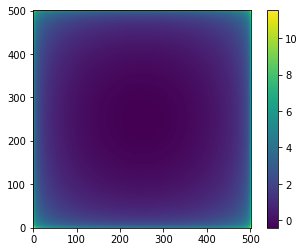

In [74]:
# USING FFT
processed_data = np.fft.fft2(data)               # returns ndarray containing complex values
newdata = np.absolute(processed_data)            # takes absolute values of elements in array

# displays the plot for compressed data
plt.imshow(np.log(newdata), origin='lower')
plt.colorbar()

plt.savefig('/Users/ronascano/Desktop/image-fft.png', format='png', bbox_inches='tight')

In [75]:
print(np.shape(data))
print(np.shape(newdata))

(501, 501)
(501, 501)


### After processing the image using fourier transform, its file size is only 24 KB.
### Also it lost most of its colors.

[[19 20 12 ... 62  4 52]
 [70 91 66 ... 44 78 90]
 [ 8 70 20 ... 28 81 18]
 ...
 [ 1 16 13 ... 11 33 94]
 [82 97 14 ... 61 75 69]
 [72 28 95 ... 87 36 66]]


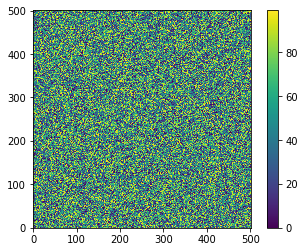

In [40]:
# create data

# creates an array with random values between 0-99 inclusive
random_501x501_array = np.random.randint(100,size=(501,501))

print(random_501x501_array)

plt.imshow(random_501x501_array, origin='lower')
plt.colorbar()

plt.savefig('/Users/ronascano/Desktop/random.png', format='png', bbox_inches='tight')

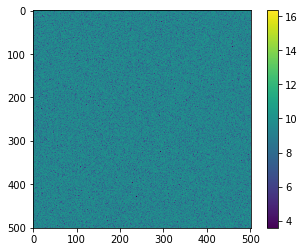

In [83]:
# now run image data through np.fft2

fft_data = np.fft.fft2(random_501x501_array)
compressed_data = np.absolute(fft_data)

plt.imshow(np.log(compressed_data))
plt.colorbar()

plt.savefig('/Users/ronascano/Desktop/random-fft.png', format='png', bbox_inches='tight')

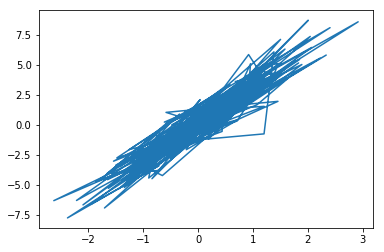

In [110]:
x = np.random.normal(size=250)
y = x * 3 + np.random.normal(size=250)

plt.plot(x,y)

In [84]:
from PIL import Image
im = Image.open("/Users/ronascano/miniconda3/symbolic-image-computer-hackers-data-security-computer-crime-internet-CPHHH3.jpg")
#im.show()

#print(list(np.asarray(im)))
image_path = ('/Users/ronascano/miniconda3/symbolic-image-computer-hackers-data-security-computer-crime-internet-CPHHH3.jpg')

def jpg_image_to_array(image_path):
  """
  Loads JPEG image into 3D Numpy array of shape 
  (width, height, channels)
  """
  with Image.open(image_path) as image:         
    image_arr = np.frombuffer(image.tobytes(), dtype=np.uint8)
    image_arr = image_arr.reshape((image.size[1], image.size[0], 3))        
    return image_arr

# spits out 3d array..

              Time    A
0    2018-10-03T14    4
1    2018-10-03T15    5
2    2018-10-03T16    5
3    2018-10-03T17    5
4    2018-10-03T18    6
5    2018-10-03T19    5
6    2018-10-03T20    5
7    2018-10-03T21    5
8    2018-10-03T22    5
9    2018-10-03T23    5
10   2018-10-04T00    5
11   2018-10-04T01    4
12   2018-10-04T02    4
13   2018-10-04T03    4
14   2018-10-04T04    4
15   2018-10-04T05    4
16   2018-10-04T06    4
17   2018-10-04T07    3
18   2018-10-04T08    3
19   2018-10-04T09    5
20   2018-10-04T10    4
21   2018-10-04T11    4
22   2018-10-04T12    4
23   2018-10-04T13    4
24   2018-10-04T14    5
25   2018-10-04T15    5
26   2018-10-04T16    5
27   2018-10-04T17    6
28   2018-10-04T18    6
29   2018-10-04T19    6
..             ...  ...
137  2018-10-09T07   17
138  2018-10-09T08   16
139  2018-10-09T09   15
140  2018-10-09T10   14
141  2018-10-09T11   14
142  2018-10-09T12   13
143  2018-10-09T13   16
144  2018-10-09T14   17
145  2018-10-09T15   19
146  2018-10-09T

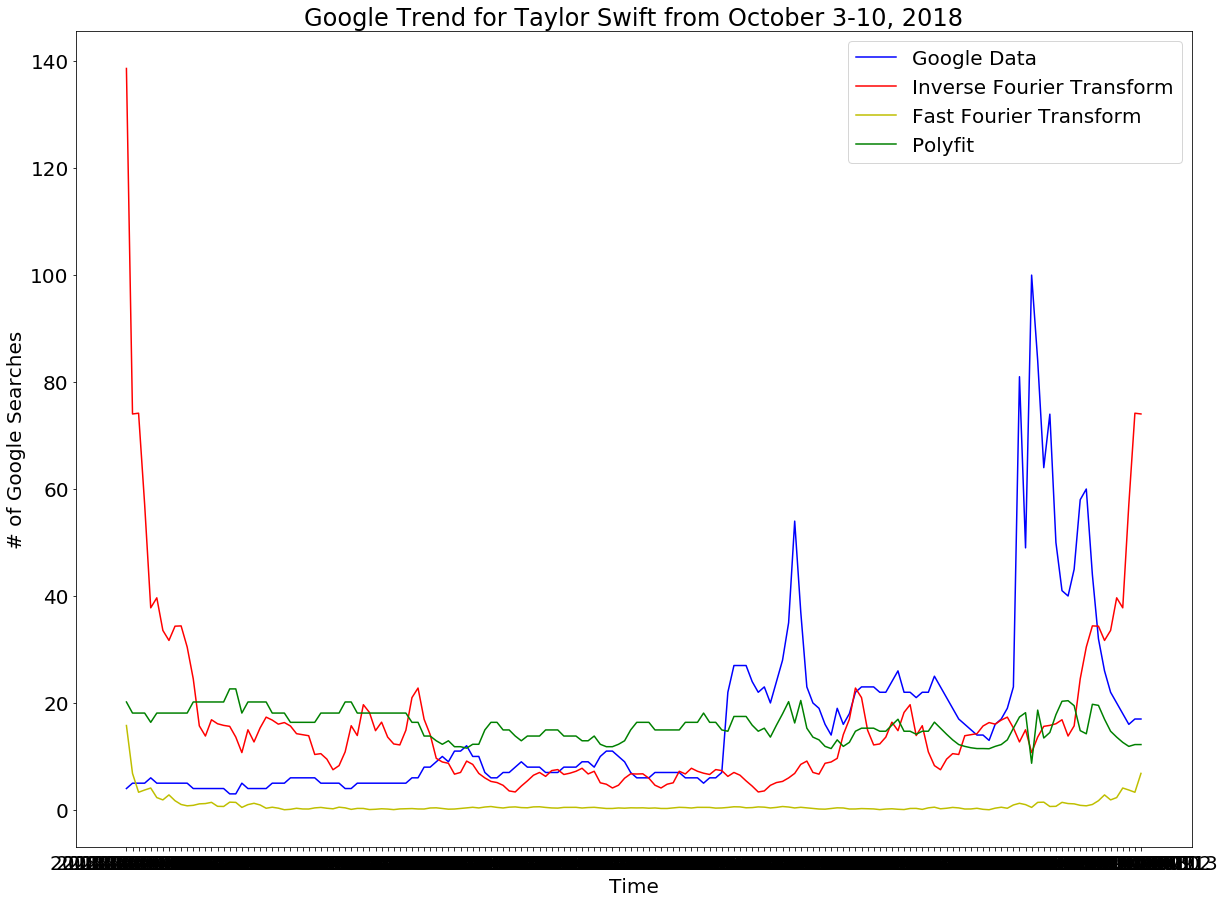

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmath import pi

# data from internet


# turned numbers format into csv so pandas can read
df = pd.read_csv('/Users/ronascano/Desktop/googletrends.csv', skipinitialspace=True, usecols=[0,1])

print(df[0:-1])

# specify x,y axes
x = df.Time
y = df.A

###---###---###---###---###---###---###---###---###---###---###---###---###---###---###---###---###---###---

# DFT
def dft( y ):
    N = len( y )
    c = np.zeros( N , complex ) 
    for k in range( N ):
        for n in range( N ):
            c[ k ] += y[ n ] * np.exp( -1j * ( 2.0 * pi * k * n ) / N )
    return np.abs(c)


#Inverse DFT
def idft( c ):
    N = len( c )
    y0 = np.zeros( N , complex )
    for k in range( N ):
        for n in range( N ):
            y0[ k ] += c[ n ] * np.exp( 1j * ( 2.0 * pi * k * n ) / N )
    return y0

###---###---###---###---###---###---###---###---###---###---###---###---###---###---###---###---###---###---

c = dft(y)
y1 = np.abs(idft(c))/len(y)

# fft
y2_dummy = np.fft.ifft(y)
y2 = np.abs(y2_dummy)

# polyfit
#fitting = np.polyfit(x,y,5)
fitting = np.poly1d(fitting)

# graph
plt.rcParams['figure.figsize'] = (20,15)
plt.rcParams.update({'font.size': 20})

plt.plot(x,y,'b',label='Google Data')
plt.plot(x,y1,'r',label='Inverse Fourier Transform')
plt.plot(x,y2,'y',label='Fast Fourier Transform')
plt.plot(x, fitting(y), 'g', label='Polyfit')

plt.ylabel('# of Google Searches')
plt.xlabel('Time')
plt.title("Google Trend for Taylor Swift from October 3-10, 2018")
plt.legend()
plt.show()


## Musican/Performer Taylor Swift, known for being apolitical, was in the news recently for supporting Marsha Blackburn a democratic candidate in Tennessee. Addtionallym, a rise in voter registrations occurred as this happened in her state.